# Measuring the Gender Pay Gap with Blinder-Oaxaca Decompositions
###### (And comparing to existing measures)
---------
#### Chris Fong and Ronald Walker

Due May 9th at 5pm

Requirements:

1. It should involve the use of real data to explore a question of interest to you.

2. The data should be analyzed using figures/maps, summary tables as well as statistical methods introduced in Ec 140, 141 or C142. As a rough guide a good project will include 2-3 figures, 2-3 displays of summary or descriptive statistics (e.g., cross-tabs) and the presentation of estimation results from a small collection of econometric models (e.g., OLS or quantile regression fits with different conditioning variables).

3. The analysis and write-up should be done in Python using a Jupyter notebook (with all project narrative included in markdown cells). Code should be clearly commented. The write-up should explain the assumptions being invoked to justify the analysis and also include a discussion and interpretation of any results. A clear discussion of the limitations of the analysis and how it might be improved through further work should also be included.

4. group projects need to include a few paragraphs explaining each team members specific contributions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
%matplotlib inline

0 -- Background

1 -- Implementation and Interpretation of Blinder-Oaxaca

2 -- Data Collection and Cleaning

3 -- Application of Blinder-Oaxaca

## 0. Background / Introduction

Motivation -- may merge w/ 1.

Relating to previous studies. Seeing how this measures up compared to other measures.

## 1. Implementation and Interpretation of Blinder-Oaxaca

Blinder-Oaxaca decompositions are easily performed in Stata with the `oaxaca` package. There is also an R package, but there is yet to be one created for Python. This project is the underlying foundation for a Python implementation.

The goal of a Blinder-Oaxaca decomposition is to take the difference in expected outcomes between two groups, and identify what contributes to the outcome gap. 

### Decompositions

*Note: Because the scope of this project is to create a greater understanding of the root of potential pay gaps, this walkthrough will be in the context of that. Our outcome of interest will be wages $w$. The two groups we will be comparing will be males $m$ and females $f$.*

In this section we'll break down the calculation of the decomposition. The wage gap in wages is the difference in the average wage for males and the average wage for females.

$$Gap = E[Wage_m] - E[Wage_f]$$

We will substitute those expectations with a linear model for each group using the following form, where $X$ are the attributes that go into determining an individual's wage, and $\epsilon$ is an error term:

$$Wage= X'\beta + \epsilon$$

where $\bar\epsilon=0$. After plugging the linear models for each gender into the $Gap$ equation, and using the assumption that the expectation of the errors is zero and making the assumption that $E[\beta]=\beta$, we are left with

$$Gap = E[X_m]'\beta_m - E[X_f]'\beta_f$$

We can further decompose the regression terms and $X$ values to identify the source of the difference. There are two main ways that Oaxaca-type decompositions are broken down.

#### 1. Three-fold

The first decomposition breaks down into three parts:

$$Gap = (E[X_m]-E[X_f])'\beta_f \quad \quad (1)$$
$$+E[X_f]'(\beta_m-\beta_f) \quad \quad \quad (2)$$
$$+(E[X_m]-E[X_f])'(\beta_m-\beta_f) \quad \quad (3)$$

Each of those represents a source of the difference, we'll call them the Endowment (1), Coefficient (2), and Interaction (3) terms.

(1) The first term is the portion of the gap that comes from different **endowments**, that is, the difference in attributes between males and females. So a difference in educational attainment would be captured here.

(2) The second term is the portion of the gap difference that comes from different **coefficients**, or the difference in returns from their attributes. So a difference in the value that education returns to wages would be captured here.

(3) The third term is the portion of the gap that comes from the **interaction** between the different endowments and coefficients.

In summary, a difference in the slope for education is in (2), and being somewhere else along that line is in (1).

-------
*It is important to note that this decomposition uses the female regression as its baseline. In (1), we use the female regression coefficients to calculate the different endowment effect, and in (2), we use the female values of $E[X]$ to calculate the impact of different coefficients. This can easily be done using a male regression baseline by switching the order of the terms.*

If we want to see the contributions to each of (1), (2), and (3) from individual variables (each row in $X$), we are able to use the fact that the each is a summation of the contribution of each subfactor. Using the Endowment term as an example, for each of the $m$ variables:

$$(E[X_m]-E[X_f])'\beta_f = \sum_{i=1}^{m}(E[X_{mi}]-E[X_{fi}])'\beta_{fi}$$

We would just pull out a term of the summation for variable analysis.

------

#### 2. Two-fold

A second type of Blinder-Oaxaca type decomposition is a two-fold decomposition. It splits the gap into two components: an explained portion $E$ and an unexplained portion $U$.

$$Gap = E + U$$

This decomposition makes the assumption that there is a set of true regression coefficients, $\beta^*.$ There are many ways to calculate the true regression line, but it is highly contextual. If it is thought that there is discrimination that is negative to one group, and not positive toward the other, $\beta^*$ may just be the coefficients of the undiscriminated group. If one group benefits and the other is hurt by discrimination, $\beta^*$ is often calculated from a pooled regression between the two groups. We will be using a pooled regression as our $\beta^*$, though there are many ways to calculate it.

The **explained** portion $E$ is called the "quantity effect", and is similar to the **endowments** term from the three-fold decomposition.

$$E = (E[X_m]-E[X_f])\beta^* $$

The **unexplained** portion $U$ captures the differences in coefficients from the true regression.

$$U = E[X_m](\beta_m-\beta^*) + E[X_f](\beta^*-\beta_f) $$

This **unexplained** portion is normally attributed to discrimination, but as stated in the Jann paper, "this interpretation hinges on the assumption that there are no relevant unobserved predictors."(4) If we have low explanatory power in our regression equations, there is potential for most of the noise to be captured in this term.

Even though discrimination is normally attributed to the coefficients, sometimes there is discrimination that presents itself in the endowment terms. For example, if a female is less likely to be admitted to school based on discrimination, then they will have lower education values that not naturally inherent to them.

#### Summary:

Three-fold: Difference in endowments, difference in returns to those endowments, interaction between those endowments and the rate of return. Uses one of the groups as a baseline. Discrimination is measured from differences in returns and (sometimes) from the interaction term.

Two-fold: difference in endowments, difference in returns from endowments. We use a pooled baseline. Discrimination is measured from the unexplained term (the difference in returns from endowments).

<font color="red">HERE</font>

### Calculating Standard Errors

### Implementation

You are able to see the steps that we perform to be able to calculate these values.

comparison to stata output to make sure that our values are correct :)

We are building on top of `statsmodels`, so the framework will easily translate to regression models outside of just OLS. (insert the paper of using logit w/ BO)

## 2. Data

Where the data set is from.

How we plan to use it.

Any standardization and cleaning you did.

Any caveats.

Summary tables and statistics.

In [4]:
Brazil = pd.read_csv('../Brazil.csv')
Canada = pd.read_csv('../Canada.csv')
Panama = pd.read_csv('../Panama.csv')
PuertoRico = pd.read_csv('../PuertoRico.csv')
UnitedStates = pd.read_csv('../UnitedStates.csv')
Brazil.head()

,COUNTRY,PERWT,AGE,SEX,MARST,NATIVITY,EDATTAIN,EMPSTAT,OCCISCO,INDGEN,INCTOT
0,Brazil,18.54,22,Male,Married/in union,Native-born,Primary completed,Employed,Crafts and related trades workers,Manufacturing,9.392662
1,Brazil,20.23,54,Male,Married/in union,Native-born,Less than primary completed,Employed,Service workers and shop and market sales,Real estate and business services,9.035987
2,Brazil,20.23,44,Female,Married/in union,Native-born,Less than primary completed,Employed,Elementary occupations,Private household services,8.522778
3,Brazil,20.23,22,Female,Single/never married,Native-born,Less than primary completed,Inactive,NIU (not in universe),NIU (not in universe),8.719317
4,Brazil,20.23,26,Female,Single/never married,Native-born,Secondary completed,Employed,Technicians and associate professionals,Health and social work,8.961879


Census data was extracted from IPUMS for Brazil, Canada, Panama, Puerto Rico, and the United States.  Canada's data is from 2011 while the rest are from 2010.  Each observation represents a person who was surveyed.  Cleaning was performed using R and imported using the **ipumsr** package.  

The following variables were selected from IPUMS: Person Weight, Age, Sex, Marital Status, Nativity, Educational Attainment, Employment Status, Occupation, Industry, and Total Income.  Only person's aged 16 and older were selected.  Total Income for Brazil and Panama was scaled by 12 to account for reporting differences (monthly vs yearly).  Total Income has also been log transformed and filtered to include only those with incomes greater than 0.  

The goal for our analysis is to use Blinder-Oaxaca decomposition on different countries' gender income gaps to calculate the explained and unexplained differentials and compare these proportions with published measures of gender inequality. To accompish this, we will regress Total Income on gender and other demographic variables.  The coefficient of the Sex variable will be used in the decomposition.

In [5]:
countries = [Brazil, Canada, Panama, PuertoRico, UnitedStates]
countryNames = ["Brazil", "Canada", "Panama", "PuertoRico", "UnitedStates"]

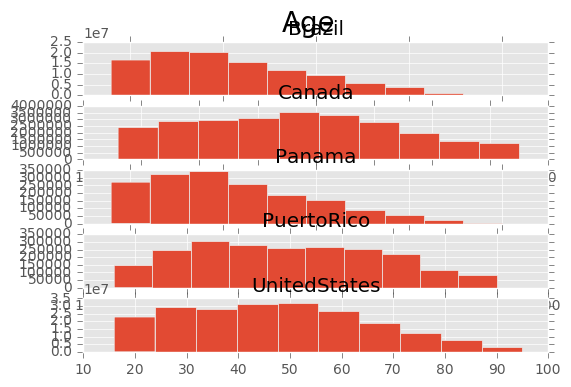

In [6]:
for i in range(0, 5):
    plt.subplot(5, 1, i+1)
    plt.hist(data=countries[i], x="AGE", weights="PERWT")
    plt.title(countryNames[i])
plt.suptitle("Age", size=20)

In [7]:
ctab1 = {}
for i in range(0, 5):
    ctab1[countryNames[i]]= pd.crosstab(
        index=countries[i]['EDATTAIN'],
        columns=countries[i]['SEX'],
        values=countries[i]['INCTOT'],
        aggfunc=np.mean
    ).round(2)
    
ctab2 = {}
for i in range(0, 5):
    ctab2[countryNames[i]]= pd.crosstab(
        index=countries[i]['EDATTAIN'],
        columns=countries[i]['SEX'],
        values=countries[i]['INCTOT'],
        aggfunc=np.size
    ).apply(lambda x: x/np.sum(x)).round(2)
    

In [8]:
from IPython.display import display

Across each country, we can see that average total income increases with education level.  Among education levels, males tend to have higher incomes.  

In [9]:
for i in range(0, 5):
    display(countryNames[i], ctab1[countryNames[i]])

'Brazil'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,8.46,8.86
Primary completed,8.47,9.07
Secondary completed,8.97,9.46
University completed,9.94,10.46


'Canada'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,9.46,9.73
Secondary completed,9.86,10.19
University completed,10.34,10.65


'Panama'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,7.20,7.89
Primary completed,7.75,8.32
Secondary completed,8.55,8.82
University completed,9.27,9.62
Unknown,10.80,10.88


'PuertoRico'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,8.54,8.77
Primary completed,8.49,8.93
Secondary completed,9.04,9.38
University completed,9.93,10.25


'UnitedStates'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,9.16,9.56
Primary completed,8.93,9.30
Secondary completed,9.64,10.07
University completed,10.38,10.92


This is interesting because when looking at the percentage of each gender at each education level, women complete University at similar or greater rates than men.

In [10]:
for i in range(0, 5):
    display(countryNames[i], ctab2[countryNames[i]])

'Brazil'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,0.41,0.41
Primary completed,0.23,0.28
Secondary completed,0.25,0.24
University completed,0.11,0.07


'Canada'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,0.17,0.17
Secondary completed,0.55,0.57
University completed,0.28,0.26


'Panama'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,0.12,0.14
Primary completed,0.32,0.44
Secondary completed,0.33,0.29
University completed,0.23,0.12
Unknown,0.00,0.00


'PuertoRico'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,0.12,0.11
Primary completed,0.15,0.18
Secondary completed,0.46,0.52
University completed,0.28,0.19


'UnitedStates'

SEX,Female,Male
EDATTAIN,,
Less than primary completed,0.02,0.02
Primary completed,0.09,0.11
Secondary completed,0.61,0.59
University completed,0.27,0.28


## 3. Application

For each country of interest:

Find current measure of pay gap inequality.

Regress log(wages) on gender and other variables (race, number of dependents, education, etc.) and control for role/industry, industry, neither.

Plot stacked bar chart of explained + unexplained.

Plot current measure of inequality vs unexplained proportion from B-O.

# ASSUMPTIONS:

* R^2 isn't terrible (fix: relative unexplained)
* discrimination lies mainly in unexplained, and doesn't spill over too much to endowments.
* by using two separate regressions, we are not imposing one set of behavior on each group. Education may not work the same way in that country for men and women.

**Citations:**

Jann, Ben, 2008. "<a href="https://EconPapers.repec.org/RePEc:ets:wpaper:5">A Stata implementation of the Blinder-Oaxaca decomposition</a>", No 5, ETH Zurich Sociology Working Papers, ETH Zurich, Chair of Sociology.

__our data source__

Kennedy, Peter & Jutta Heinrichs, 2007. "A computational trick for calculating the Blinder-Oaxaca decomposition and its standard error," Economics Bulletin, AccessEcon, vol. 3(66), pages 1-7.